Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[Arkadz Kirshtein](https://math.tufts.edu/people/facultyKirshtein.htm) <arkadz.kirshtein@tufts.edu>  
*Fall 2023*

*Based on materials created by James Adler and George McNinch*

Course material (Class 11): Statistics & the Central Limit Theorem
----------------------------------------------------------------

Why statistics?
================

From the point-of-view of modeling, one often needs information about average values and expected values.

To reason precisely in this setting, we need the language of statistics.

Here are some examples to keep in mind for our discussion:

- Consider a *lottery* in which 4 million tickets are sold each week, for \\$1 each. Of these, one ticket wins \\$1.5 million, 500 tickets win \\$ 800, \\$10,000 tickets win \\$10. If you buy a ticket, how much should you *expect* to win??

- At a certain grocery store between the hours of 10 AM and noon, one expects a customer needs to check out every two minutes, and the average check-out time is 3 minutes. How many registers should be staffed?

Mean, variance, and standard deviation
======================================

Let $X = \{x_i\}_{i=1,\dots,n}$ be a data set of $n$ values (real numbers!).

The **mean** (or average) of $X$ is $$\mu = \mu(X) = \dfrac{1}{n} \sum_{i=1}^n x_i.$$

The **median** of $X$ is the number $\overline{x}$ with the following properties:

$x_i \le \overline{x}$ for $\dfrac{n}{2}$ values of $i \in \{1,2,\dots,n\} \quad \text{and} \quad  
x_j \ge \overline{x}$ for $\dfrac{n}{2}$ values of $j \in \{1,2,\dots,n\}.$

Suppose we re-arrange the numbers $x_i$ so that

$$x_1 \le x_2 \le \cdots \le x_{n-1} \le x_n;$$

if $n$ is odd, then $\overline{x} = x_{(n+1)/2}$.

if $n$ is even, a common convention is take $\overline{x}$ to be the average of
$x_{n/2}$ and $x_{1+n/2}$.

Examples:
=========

In [1]:
import pandas as pd
import numpy as np


In [2]:
d = [[1,2,3,4,5],
     [1,2,3,6]]
X = pd.DataFrame(d)

pd.DataFrame({"mean":X.mean(axis=1),
              "median":X.median(axis=1)})



,mean,median
0,3.0,3.0
1,3.0,2.5


Let's generate some *random* data use the ``python`` module ``pandas``, and compute means and medians

In [3]:
from numpy.random import default_rng

rng = default_rng()
X =pd.DataFrame(rng.integers(0,20,size=(100,10)))
X

,0,1,2,3,4,5,6,7,8,9
0,13,7,7,16,4,6,12,19,14,6
1,10,3,7,13,15,6,8,19,6,2
2,0,15,17,4,2,0,4,4,15,4
3,15,7,5,10,3,8,13,5,6,17
4,15,0,2,7,14,19,1,11,6,19
...,...,...,...,...,...,...,...,...,...,...
95,2,8,17,5,1,15,17,10,18,1
96,19,18,19,19,5,2,5,3,2,3
97,4,1,0,15,5,5,2,19,18,7
98,9,9,14,5,6,12,0,7,14,16


In [4]:
pd.DataFrame({"median":X.median(),
              "mean":X.mean()})

,median,mean
0,11.0,10.30
1,9.0,9.56
2,9.0,9.18
3,9.0,9.77
4,6.0,8.25
5,10.0,9.48
6,9.5,9.36
7,10.0,10.04
8,10.0,9.61
9,8.0,9.00


In [5]:
pd.DataFrame({"variance": X.var(),
              "standard deviation":X.std()})

,variance,standard deviation
0,29.868687,5.465225
1,31.541818,5.616210
2,33.967273,5.828145
3,30.582929,5.530183
4,33.280303,5.768908
5,30.494545,5.522187
6,31.545859,5.616570
7,33.715556,5.806510
8,32.543333,5.704676
9,35.050505,5.920347


What do you lose by only knowing mean/median?
==============================================

Suppose that $X = \{x_i\}$ represents wait times in minutes at a certain bus-stop at 7:00 AM each day.
Over $n$ days, you collect the wait time values $x_1,x_2,\dots,x_n$. The mean wait time 

$$\mu(X) = \dfrac{1}{n} \sum_{i=1}^n x_i$$

is surely a relevant statistic! 


Let's consider a number of different possible outcomes
```
X = pd.DataFrame({"week1":[1,2,5,7,3,6],
                  "week2":[1,1,1,7,7,7],
                  "week3":[3,3,3,5,5,5],
                  "week4":[1,2,3,5,6,70],
                  "week5":[1,2,3,3,5,10]})
```

Let's compute the mean/median for the alternative outcomes.


In [6]:
X = pd.DataFrame({"week1":[1,2,5,7,3,6],
                  "week2":[1,1,1,7,7,7],
                  "week3":[3,3,3,5,5,5],
                  "week4":[1,2,3,5,6,70],
                  "week5":[1,2,3,3,5,10]})
X


,week1,week2,week3,week4,week5
0,1,1,3,1,1
1,2,1,3,2,2
2,5,1,3,3,3
3,7,7,5,5,3
4,3,7,5,6,5
5,6,7,5,70,10


In [7]:
pd.DataFrame({"mean":X.mean(),
              "median":X.median()})

,mean,median
week1,4.0,4.0
week2,4.0,4.0
week3,4.0,4.0
week4,14.5,4.0
week5,4.0,3.0


### Observe:

The crucial observation is that a number of different outcomes produce the same or similar medians and means!

Variance
========

The preceding data was supposed to persuade you that by themselves, the mean and median hide information -- e.g. the "range" of the values taken.

The **variance** of $X$, written $\operatorname{var}(X)$, is the mean of the following values:

$$\{(x_i - \mu)^2 \mid i = 1,2,\dots,n\};$$

thus
$$\operatorname{var}(X) = \dfrac{1}{n} \sum_{i=1}^n (x_i - \mu)^2.$$

The variance amounts to the average distance (really: squared distance) of the data values from the average value.



Unfortunately the *units* of the variance are the square of those of $X$. E.g. if the values in $X$ measure
minutes (waiting for the bus, say) then the units of $\operatorname{var}(X)$ are $\operatorname{min}^2$.

So rather than the variance, one often consider the **standard deviation** $\sigma = \sigma(X)$ which by definition is the *square root* of the variance:

$$\sigma(X) = \left(\operatorname{var}(X)\right)^{1/2} = \left(\dfrac{1}{n} \sum_{i=1}^n (x_i - \mu)^2\right)^{1/2}.$$

The units of $\sigma(X)$ match those of $X$.

In [8]:
X

,week1,week2,week3,week4,week5
0,1,1,3,1,1
1,2,1,3,2,2
2,5,1,3,3,3
3,7,7,5,5,3
4,3,7,5,6,5
5,6,7,5,70,10


In [9]:
pd.DataFrame({"variance": X.var(),
              "standard deviation":X.std()})

,variance,standard deviation
week1,5.6,2.366432
week2,10.8,3.286335
week3,1.2,1.095445
week4,742.7,27.252523
week5,10.4,3.224903


Random Variables & probability density functions
================================================

Now view the data set $X$ as arising from some *process*. 

For example, $X$ may be generated by rolling a 6-sided dice.
Or $X$ may be generated by finding the wait-time at a certain bus stop at 7:00 AM.

We want to be able to study or speak about the process that controls the generation of this data.



For this, we want to define the notion of a *random variable*. If you look e.g. at the discussion on the
[wikipedia page](https://en.wikipedia.org/wiki/Random_variable) you'll see the following:

> In probability and statistics, a random variable [...] is described informally as a variable whose values depend on outcomes of a random phenomenon

> A random variable's possible values might represent the possible outcomes of a yet-to-be-performed experiment, or the possible outcomes of a past experiment whose already-existing value is uncertain (for example, because of imprecise measurements or quantum uncertainty). They may also conceptually represent either the results of an "objectively" random process (such as rolling a die) or the "subjective" randomness that results from incomplete knowledge of a quantity. The meaning of the probabilities assigned to the potential values of a random variable is not part of probability theory itself

So we'll just say that a random variable $X$ is a variable that assumes a value each time a particular random process is realized.


Examples of random variables:
-----------------------------

- The value $Y$ representing the outcome of rolling a 6-sided dice.

  $Y$ is a *discrete* random variable, because $Y$ can only take the values $\{1,2,3,4,5,6\}$.
  
- The value $T$ representing wait-time at the bus, in minutes.

  $T$ is a *continuous* random variable, since the wait time is described by a non-negative *real number*.

Probability distribution
========================

A probability distribution describes the probabilities with which a random variable assume its possible values.

For example, if $Y$ is the random variable as before which describes a roll of a *fair* 6-sided dice, there
are 6 outcomes: $r = 1,2,3,4,5,6$. The probability that $Y$ assumes any of these values is
$$P(Y=r) = \dfrac{1}{6}.$$

Let $Y2$ be the random variable that describes the result of adding the values for a simultaneous roll of 2 fair 6-sided dice.  Here the outcomes are the values $r=2,3,4,\dots,12$.

Let's compute the probabilities. The main thing we need is to count the number of times that a number $k$ can be written
as a sum $k=i+j$ where $1 \le i,j \le 6$.

We use the ``value_counts`` method for this:

In [10]:
from itertools import product
I = [1,2,3,4,5,6]

results_2 = pd.DataFrame([i+j for i,j in product(I,I)])
Y2_prob = results_2.value_counts() /len(I)**2

Y2_prob

7     0.166667
8     0.138889
6     0.138889
9     0.111111
5     0.111111
10    0.083333
4     0.083333
11    0.055556
3     0.055556
12    0.027778
2     0.027778
dtype: float64

The indices ``r`` in the dataframe ``Y2_prob`` represent the possible dice-roll values, and the values represent the corresponding probabilities.

Continuing this point of view, consider the random variable Y3 determined by the sum of 3 simultaneous rolls of a 6-sided dice.

In [11]:
results_3 = pd.DataFrame([i+j+k for i,j,k in product(I,I,I)])
Y3_prob = results_3.value_counts()/len(I)**3

Y3_prob

11    0.125000
10    0.125000
12    0.115741
9     0.115741
13    0.097222
8     0.097222
14    0.069444
7     0.069444
15    0.046296
6     0.046296
16    0.027778
5     0.027778
17    0.013889
4     0.013889
18    0.004630
3     0.004630
dtype: float64

In [12]:

## 
results_1 = pd.DataFrame([i for i in I])
Y1_prob = results_1.value_counts()/len(I)
Y1_prob

6    0.166667
5    0.166667
4    0.166667
3    0.166667
2    0.166667
1    0.166667
dtype: float64

Probability distributions -- case of a continuous random variable
==================================================================

For a continuous random variable $X$ and a real number $r$, usually the probability $P(X=r)$ is **zero**;
this reflects the fact that there are *a lot* of real numbers!

Instead, in this setting one considers the *probability density function* $f(x)$ with the following property:

the probability that $X$ is in the interval $[a,b]$ is 

$$P(a\le X \le b) = \int_a^b f(x)dx$$

Note that the value of the random variable $X$ has to be *somewhere*, so in particular we require that

$$P(-\infty < X < \infty) = \int_{-\infty}^\infty f(x) dx = 1.$$

On the other hand, as is well-known from integral calculus, we have:

$$P(X=a) = \int_a^a f(x) dx = 0$$



Statistics for a discrete random variable
=========================================

For a discrete random variable $Y$, the expected value $E(Y)$ is the weighted average of the possible values
that $Y$ can take. More precisely, if the values that $Y$ can take are $I =\{y_1,y_2,\dots,y_N\}$, then

$$E(Y) = \sum_{i=1}^N y_iP(y_i)= \sum_{i=1}^N y_iP(Y=y_i).$$

and the *variance* of $Y$ is 

$$\operatorname{var}(Y) = E\left((Y-\mu)^2\right) \quad \text{if $\mu = E(Y)$}$$


Example:

- one roll of 6-sided dice

  If $Y$ represents rolling a fair 6-sided dice, $P(r) = P(Y=r) = \dfrac{1}{6}$, and so

  $$E(Y) = \sum_{i=1}^6 \dfrac{1}{6}\cdot i = \dfrac{1+2+3+4+5+6}{6} = \dfrac{21}{6} = 3.5$$

  and the variance is
  
  $$\operatorname{var}(Y) = E\left( (Y-3.5)^2 \right) = \sum_{i=1}^6 \dfrac{(3.5-i)^2}{6}$$
  

Let's confirm this using ``python``:

In [13]:
Y_expected = sum([value*prob for (value,),prob in Y1_prob.iteritems()],0)

Y_var = sum([(Y_expected - value)**2 * prob for (value,),prob in Y1_prob.iteritems()],0)

[Y_expected, Y_var]

[3.5, 2.9166666666666665]

- two or three 6-sided dice

  If $Y2$, $Y3$ represent the simultaneously rolling of two, resp. three, 6-sided dice and adding the results, we computed above
  the values $P(Y2 = r)$ for $2 \le r \le 12$ and $P(Y3=r)$ for $3 \le r \le 18$.
  
  Let's compute the expected values. Recall that the probabilities are stored in the variables
  ``Y2_prob`` and ``Y3_prob``.

In [14]:
Y2_expected = sum([value*prob for (value,),prob in Y2_prob.iteritems()],0)
Y2_var = sum([(Y2_expected - value)**2 * prob for (value,),prob in Y2_prob.iteritems()],0)

[Y2_expected, Y2_var]

[6.999999999999998, 5.833333333333333]

In [15]:
Y3_expected = sum([value*prob for (value,),prob in Y3_prob.iteritems()],0)
Y3_var = sum([(Y3_expected - value)**2 * prob for (value,),prob in Y3_prob.iteritems()],0)


[Y3_expected, Y3_var]

[10.500000000000002, 8.749999999999998]

Statistics for a continuous random variable (definitions)
===========================================

Suppose the continuous random variable $Y$ is determined by the probability distribution function $f(x)$.
The expected value $E(Y)$ is given by

$$\mu = E(Y) = \int_{-\infty}^\infty x\cdot f(x) dx$$

The *variance* of $Y$ is defined to be

$$\sigma^2 = \operatorname{var}(Y) = \int_{-\infty}^\infty (x - \mu)^2\cdot f(x) dx$$

and the standard deviation is

$$\sigma = \sqrt{\operatorname{var}(Y)}$$.

Normal distribution
===================

Perhaps the most important probability distribution function is known as the *Gaussian* or *normal* distribution. For mean $\mu$ and standard deviation $\sigma$, the probability density function is determined by

$$f(x) = \dfrac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-{\dfrac{(x-\mu)^2}{2\sigma^2}}\right)$$

This probability distribution function determines a continuous random variable 
$Y_{\operatorname{normal}}$ with expected value $\mu$ and standard deviation $\sigma$; these latter conditions mean:

$$\mu = E(Y_{\operatorname{normal}}) = \int_{-\infty}^\infty x \cdot \dfrac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-{\dfrac{(x-\mu)^2}{2\sigma^2}}\right) dx$$

and

$$\sigma^2 = \operatorname{var}(Y_{\operatorname{normal}}) = \int_{-\infty}^\infty (x-\mu)^2 \cdot \dfrac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-{\dfrac{(x-\mu)^2}{2\sigma^2}}\right) dx $$

-------

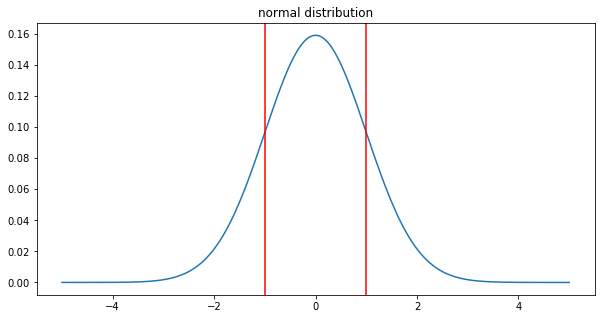

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-5,5,200)
## density function with mu = 0 and sigma = 1
def f(x):
    return np.exp(-x**2/2)/(2*np.pi)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, f(x))
ax.set_title("normal distribution")
ax.axvline(x=1,color="red")
ax.axvline(x=-1,color="red")

Law of Large Numbers
====================

Suppose that $Y$ is a random variable (discrete or continuous), and consider a sample $X_1,\dots,X_n$ of $n$ events drawn from the random variable, for $n \ge 1$. We write $\overline{X}_n$ for the mean of this sample:

$$\overline{X}_n = \dfrac{1}{n} \sum_{i=1}^n X_i$$

We can view the sample mean $\overline{X}_n$ as a random variable (depending on the choices made)!

**Law of Large Numbers:** The sample means $\overline{X}_n$ converges to the expected value $E(Y)$ as $n \to \infty$.



This formulation hides a bit of complexity; namely, what does precisely is meant by convergence in this context? We'd like to write something like

$$\overline{X}_n \xrightarrow{\operatorname{prob}} E(Y) \quad \text{as $n \to \infty$}$$

to indicate "converges in probability" (which we haven't defined...). Here is more a precise form, which is known as the *weak* law of large numbers. This weak law says that

$$\lim_{n \to \infty} P(|\overline{X}_n - E(Y)| > \epsilon) = 0 \quad \text{for any $\epsilon > 0$}.$$

Roughly speaking, this formulation means that the probability that the sample mean is even "slightly" different from the expected value goes to 0 as the number of trials goes to infinity.



We aren't going to try to be completely precise here -- this is a course about modeling, not the full details of probability! -- but it is perhaps worth mention that we need to be more precise about what is meant by the probability $P(|\overline{X}_n - E(Y)| > \epsilon)$; this depends on viewing the sample mean $\overline{X}_n$ as a random variable.

Very roughly speaking, the idea is that as the sample sizes grow, you can expect the sample mean to behave like the expected value of the random variable.

If you'd like to know a bit more, the [wikipedia article on the Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) is worth scanning.

The Central Limit Theorem
======================

Let's keep the notation and terminology from the preceding discussion. Thus the $X_1,\dots,X_n$ represent random samples of $n$ events drawn from the random variable $Y$, for $n \ge 1$.

We view the choice of each sample as $X_i$ as a random variable; we want to suppose that these random variables are [independent from one-another and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) -- abbreviated i.i.d. In particular,
$E(X_i) = E(Y) = \mu$ and $\operatorname{var}(X_i) = \operatorname{var}(Y) = \sigma^2$.

Recall that we view the sample mean $\overline{X}_n$ as a random variable. Thus, we can view
$\sqrt{n} \cdot (\overline{X}_n - \mu)$ as a random variable, which is thus given by its distribution -- i.e. by its probability density function.



**Theorem:** ([Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)) If $\{X_1,\dots,X_n\}$ are i.i.d., then as $n \to\infty$, the distribution of $\sqrt{n} \cdot (\overline{X}_n - \mu)$ converges to the normal distribution with expected value $0$ and variance $\sigma^2$.

---------------

Note that if $f_n$ is the probability distribution function for the random variable $\overline{X}_n$, then for real numbers $a<b$,

$$P(a<\overline{X}_n < b) = \int_a^b f_n(x)ds$$

so that

$$(\clubsuit) = P\left(\sqrt{n}(a - \mu) < \sqrt{n}(\overline{X}_n - \mu) < \sqrt{n}(b - \mu) \right) = \int_a^b f_n(x)dx$$

On the other hand, for large $n$ the Theorem says that, at least roughly,

$$(\clubsuit) \approx \dfrac{1}{\sigma \sqrt{2\pi}} \int_{\sqrt{n}(a - \mu)}^{\sqrt{n}(b - \mu)} \exp\left(-\left(\dfrac{x}{\sigma}\right)^2\right)dx$$

(The RHS reflects the indicated *normal distribution*).
Now use the substitution $v = \dfrac{x}{\sqrt{n}} + \mu$; the RHS becomes

$$\dfrac{1}{(\sigma/\sqrt{n}) \sqrt{2\pi}} \int_a^b \exp\left(- \left( \dfrac{v-\mu}{\sigma/\sqrt{n}}\right)^2 \right)dv
$$ 

**Conclusion:** the theorem says that  for large enough $n$, the distribution of $\overline{X}_n$ is close to the normal distribution with mean $μ$ and variance $\sigma ^{2}/n$.

Examples
========

### Coin tossing

First, view the a coin toss as a random variable making a choice between ``0`` and ``1``, and compute the mean of ``num_tosses`` choices -- i.e. $X_1,\dots,X_n$ all represent the result of a coin toss, and $\overline{X}_n$ is the mean of this trial.



We repeat this for several trials to describe the *distribution* of $\overline{X}_n$:

In [17]:
def report(df):
    ## return a string with the standard deviation and mean of the
    ## DataFrame df
    return "\n".join([f"std:  {df.std().values}",
                      f"variance: {df.var().values}",
                      f"mean: {df.mean().values}"])

#------------------------------

results=[0,1]

## use  rng.choice([...],n) to pick n random elements from the list [...]

def coin_toss_trial(num_tosses):
    return pd.DataFrame(rng.choice(results,num_tosses)).mean()

def coin_distribution(num_trials,num_tosses):
    return pd.DataFrame(map(coin_toss_trial,num_trials*[num_tosses]))

cd_100=coin_distribution(3000,100)
cd_200=coin_distribution(3000,200)

std:  [0.050453]
variance: [0.00254551]
mean: [0.50055667]


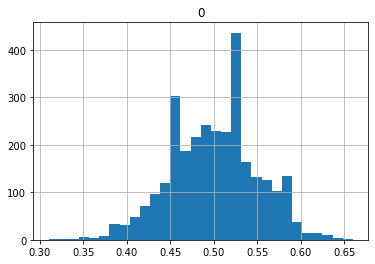

In [18]:
cd_100.hist(bins=30)
print(report(cd_100))

Of course, this confirms that  the mean is tending to ``0.5``. 

Recall that each of the "coin toss" random variables $X_i$ has mean ``1/2`` and variance
$$\operatorname{var}(X_i) = \left(\left(0 - \dfrac{1}{2}\right)^2 + \left(1 - \dfrac{1}{2}\right)^2 \cdot \right)\dfrac{1}{2} = \dfrac{1}{4}.$$

Thus the central limit theorem predicts that the variance $\operatorname{var}(\overline{X}_n)$ should 
be $\dfrac{1}{4n}$ and $\sigma = \sqrt{\dfrac{1}{4n}}$.

For $n=100$, this amounts to $\operatorname{var}(\overline{X}_{100}) =  \dfrac{1}{400} = 0.0025$ and $\sigma = \sqrt{\dfrac{1}{400}} = .05$

For $n=200$, this amounts to $\operatorname{var}(\overline{X}_{100}) =  \dfrac{1}{800} = 0.00125$ and $\sigma = \sqrt{\dfrac{1}{800}} = .035355$

std:  [0.03556815]
variance: [0.00126509]
mean: [0.50109333]


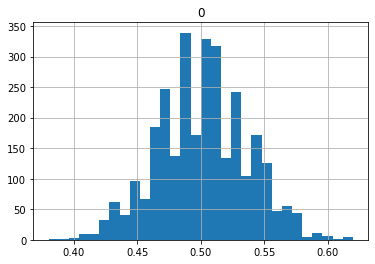

In [19]:
cd_200.hist(bins=30)
print(report(cd_200))

Dice Rolling
------------

We consider an ordinary 6-sided dice. We'll look at two scenarios: a *fair* die where all rolls occurs with equal probability, and a *broken* die.

We view the random variable $X_i$ as the outcome of a die-roll. We consider a sample $X_1,X_2,\dots,X_n$ and we compute the sample mean $\overline{X}_n$. 

Our goal is to describe the distribution of the sample mean $\overline{X}_n$.


In [20]:
six_sided_dice = [1,2,3,4,5,6]

fair_prob    = np.array(6*[1/6])
broken_prob = (1./9)*np.array([3,2,1,1,1,1])

## rng.choice(six_sided_dice,n) = rng.choice(six_sided_dice,n,p=fair_prob) returns a list of 
##    n random of a fair six-sided dice
## rng.choice(six_sided_dice,n,p=broken_prob) again rolls the dice n times, but with 
##    the indicated probabilities for the rolls

def dice_trial(pr=fair_prob):
    ## dice_trial() returns a function, suitable for passing to map(...)
    ## if f = dice_trial(), then f(n) returns a DataFrame with the results 
    ## of n dice roll results
    return lambda n: pd.DataFrame(rng.choice(six_sided_dice,n,p=pr)).mean()


def dice_distribution(num_trials,sample_size,pr=fair_prob):
    return pd.DataFrame(map(dice_trial(pr),num_trials*[sample_size]))


Recall for a fair die, each random variable has expected value

$$E(X_i) = \dfrac{1+2+3+4+5+6}{6} = 3.5$$

and variance

$$\operatorname{var}(X_i) = \dfrac{1}{6}\sum_{j=1}^6 (j - 3.5)^2 \approx 2.9167$$



Our "broken die" probabilities are ``[1/3,2/9,1/9,1/9,1/9,1/9]``

So our expected value for the broken dice rolls can be determined using the following code:


In [21]:

broken_prob = (1./9)*np.array([3,2,1,1,1,1])
E=sum([(j+1)*broken_prob[j] for j in range(6)],0)

V=sum([(E-j-1)**2*broken_prob[j] for j in range(6)],0)

[E,V]

[2.7777777777777772, 3.0617283950617282]

Thus in this case $E(X_i) \approx 2.778$ and $\operatorname{var}(X_i) \approx 3.062$.

Lets simulate some trials for both sorts of diceand various sample sizes.

In [22]:


dd_fair_50 = dice_distribution(num_trials=3000,sample_size = 50)
dd_fair_100 = dice_distribution(num_trials=3000,sample_size = 100)

dd_broken_50 = dice_distribution(num_trials=3000,sample_size=50,pr=broken_prob)
dd_broken_100 = dice_distribution(num_trials=3000,sample_size=100,pr=broken_prob)



For a fair die, and $n$ trials, the central limit theorem predicts

$\operatorname{var}(\overline{X}_n) = \dfrac{2.9167}{n}$.

|$n$  | var |
|--:  | -------------------------:|
|  50 | 0.05833                   | 
| 100 | 0.029167                  |


In [23]:
print(report(dd_fair_50))
print(report(dd_fair_100))

std:  [0.2409995]
variance: [0.05808076]
mean: [3.50387333]
std:  [0.17299077]
variance: [0.02992581]
mean: [3.50142667]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6db0065f8>]],
      dtype=object)

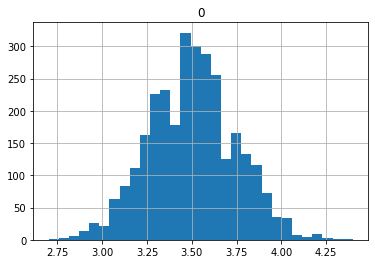

In [24]:
dd_fair_50.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d1dbc668>]],
      dtype=object)

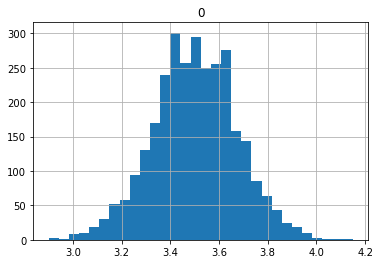

In [25]:
dd_fair_100.hist(bins=30)

For our broken die, and $n$ trials, the central limit theorem predicts

$\operatorname{var}(\overline{X}_n) = \dfrac{3.062}{n}$.

|$n$  | var |
|--:  | -------------------------:|
|  50 | 0.06124                   | 
| 100 | 0.03062                  |

In [26]:
print(report(dd_broken_50))  
print(report(dd_broken_100))  

std:  [0.24874694]
variance: [0.06187504]
mean: [2.77438]
std:  [0.17566538]
variance: [0.03085832]
mean: [2.77216667]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d1c34d68>]],
      dtype=object)

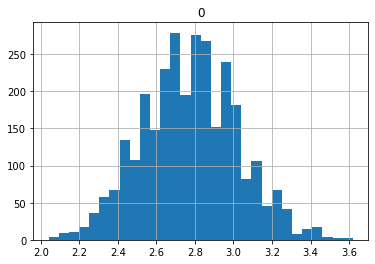

In [27]:
## "broken" dice results
##
dd_broken_50.hist(bins=30)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d206e940>]],
      dtype=object)

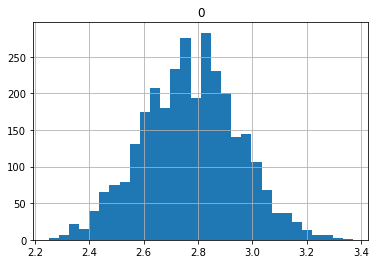

In [28]:
dd_broken_100.hist(bins=30)

Random Number Generation
========================

We have been using the [random number generator](https://en.wikipedia.org/wiki/Random_number_generation) provided by ``numpy`` without much comment.

e.g. we've seen that

```
from numpy.random import default_rng
rng = default_rng()
```

produces an object ``rng`` with methods include ``random`` and ``choice``:

```
>>> rng.random(4)
array([0.1403315 , 0.32259798, 0.60620108, 0.7533085 ])

>>> rng.choice(["red","blue","green"],5)
array(['blue', 'green', 'blue', 'green', 'red'], dtype='<U5')
```


Really, these methods only produce so-called *pseudo-random* results. A common way to produce a list of *pseudo-random* numbers is to begin with a ``seed`` value $X_0$, and then describe an algorithm
for computing $X_n$ from $X_{n-1}$ for any $n \ge 1$.

A standard example for generating random integers depends on a  choice of large integers $a,b,m$; one then sets

$$X_n = aX_{n-1} + b \pmod{n}$$

If the algorithm is good enough, the resulting sequence of numbers "seems random" e.g. in the sense of passing
[statistical tests for randomness](https://en.wikipedia.org/wiki/Statistical_randomness). 

Note however, that if you know the seed and the algorithm, you can construct the sequence. One says that the sequence is deterministic -- which doesn't seem very random!! Such determinism can be problematic e.g. in crypotgraphy. But for our point-of-view, pseudo-random numbers are very useful in modeling.

For example, statistics and random number generators will be very important to modeling applications of so-called *Monte-Carlo simulations* that we will study this week.